In [1]:
import healpy as hp
from pixell import powspec, curvedsky, lensing
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

# Test reading in PS

In [3]:
map_dir = '/global/cscratch1/sd/hongbo/lens_rot_bias/Maps/'
ps_dir = '/global/cscratch1/sd/hongbo/lens_rot_bias/inputPs/'
ps = np.loadtxt(ps_dir + 'cosmo2017_10K_acc3_lenspotentialCls.dat')
cltt = np.concatenate(([0,0], ps[:, 1]))
clee = np.concatenate(([0,0], ps[:, 2]))
clbb = np.concatenate(([0,0], ps[:, 3]))
clte = np.concatenate(([0,0], ps[:, 4]))

In [6]:
lmax = 3000
ls = np.arange(lmax+1)
fac = ls*(ls+1)/(2*pi)

In [32]:
ps_camb = powspec.read_camb_full_lens(ps_dir + 'cosmo2017_10K_acc3_lenspotentialCls.dat')
ps_camb[0, 1:, :] = 0.                                                                     
ps_camb[1:, 0, :] = 0.

In [ ]:
cmb_seed = (isim, 0, 0, 0)                                                                
phi_seed = (isim, 0, 2, 0)

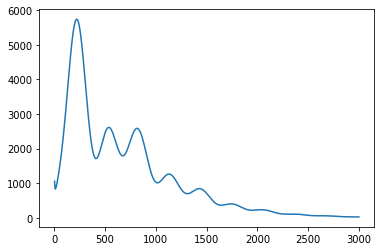

In [20]:
plt.plot(ls[2:], cltt[ls][2:]) 

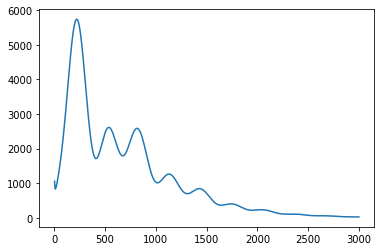

In [42]:
plt.plot(ls[2:], (fac*ps_camb[1, 1, :][ls])[2:])
# plt.yscale('log')

In [21]:
ps_camb.shape

(4, 4, 10001)

In [7]:
sim_num = 1

In [8]:
# teb_alm = hp.read_alm(map_dir + 'CMB_fullsky_alm_00%s.fits' %sim_num, hdu=(1,2,3))
alpha_alm = hp.read_alm(map_dir + 'alpha_fullsky_alm_1e-08_000.fits')
# rot_teb_alm = hp.read_alm(map_dir + 'CMBRot_fullsky_alm_1e-07_00%s.fits' %sim_num, hdu=(1,2,3))

# test power spectrum

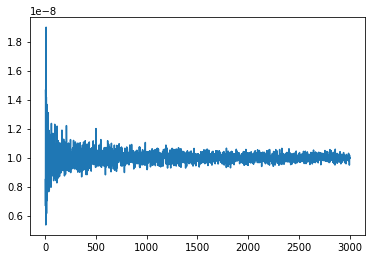

In [9]:
# rotation field 
claa = hp.alm2cl(alpha_alm.astype('cdouble'))
plt.plot(ls[2:], (fac*claa[:lmax+1])[2:])

In [124]:
# unrotated CMB field
cls = hp.alm2cl(teb_alm.astype('cdouble'))

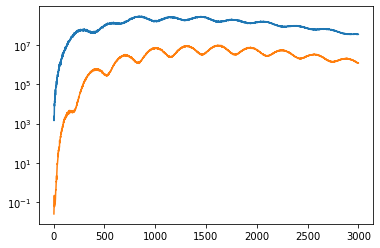

In [128]:
plt.plot(ls[2:], (fac*cls[0, :lmax+1])[2:])
plt.plot(ls[2:], (fac*cls[1, :lmax+1])[2:])
plt.plot(ls[2:], cls[2, :lmax+1][2:])
# plt.plot(ls[2:], abs((fac*cls[3, :lmax+1]))[2:])
# plt.plot(ls[2:], (fac*cls[4, :lmax+1])[2:])
# plt.plot(ls[2:], (fac*cls[5, :lmax+1])[2:])
plt.yscale('log')

In [129]:
# rotated CMB field
cls_rot = hp.alm2cl(rot_teb_alm.astype('cdouble'))

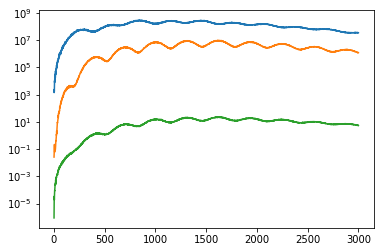

In [130]:
plt.plot(ls[2:], (fac*cls_rot[0, :lmax+1])[2:])
plt.plot(ls[2:], (fac*cls_rot[1, :lmax+1])[2:])
plt.plot(ls[2:], (fac*cls_rot[2, :lmax+1])[2:])
plt.yscale('log')